In [14]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import glob
from shutil import copyfile
from dogcat_data import generators
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [15]:
if not os.path.exists("augment/dog"):
    os.makedirs("augment/dog")
        
copyfile(glob.glob("./dogcat-data/train/dog/*")[0], "augment/dog/"+ glob.glob("./dogcat-data/train/dog/*")[0].split("/")[-1])

'augment/dog/dog.874.jpg'

Found 2 images belonging to 1 classes.


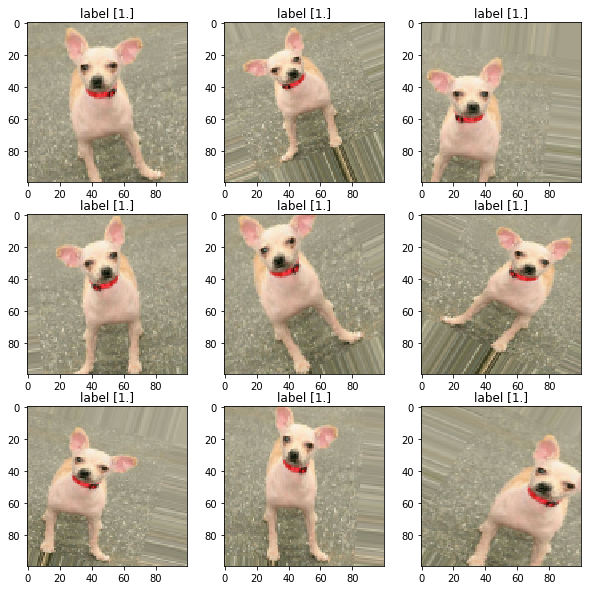

In [17]:
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_iter = train_datagen.flow_from_directory(
    "augment",
    target_size=(100, 100),
    batch_size=9,
    class_mode="categorical"
)
plt.rcParams['figure.figsize'] = (10,10)
for i in range(9):
    images, labels = next(train_iter)
    plt.subplot(3,3,i+1)
    plt.imshow((images[0] - np.min(images[0])) / np.ptp(images[0]), interpolation='none')
    plt.title("label {}".format(labels[0]))